<a href="https://colab.research.google.com/github/vishnusankar2203/To-Do-list/blob/main/MNIST_Handwritten_Digit_Classifier_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"MNIST Handwritten Digit Classifier with CNN"**



Import Necessary Libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Load the MNIST Dataset:

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocess the Data:

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


Convert Labels to Categorical:

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


Build the CNN Model:

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model:

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Train the Model:

In [ ]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.8916 - loss: 0.3445 - val_accuracy: 0.9845 - val_loss: 0.0487
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 33ms/step - accuracy: 0.9849 - loss: 0.0508 - val_accuracy: 0.9864 - val_loss: 0.0463
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9891 - loss: 0.0342 - val_accuracy: 0.9886 - val_loss: 0.0319
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.9904 - val_loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9911 - val_loss: 0.0274


Evaluate the Model:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 7ms/step - accuracy: 0.9911 - loss: 0.0274
Test accuracy: 0.991100013256073


Plot Training History:

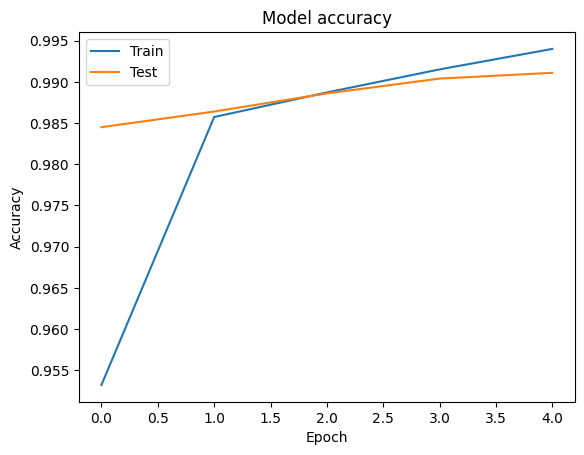

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Save the Model:

In [ ]:
model.save('mnist_cnn_model.h5')


Load the Trained Model:

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('mnist_cnn_model.h5')


Preprocess Image for Prediction:

In [ ]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize((28, 28))  # Resize to match the input shape
    image = np.array(image)
    image = image / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=-1)  # Add channel dimension (28,28,1)
    image = np.expand_dims(image, axis=0)  # Add batch dimension (1,28,28,1)
    return image


Upload Image in Colab:

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Tiger.jpg to Tiger.jpg


Predict the Digit:

In [ ]:
for file_name in uploaded.keys():
    img = preprocess_image(file_name)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction[0])
    print(f'Predicted digit: {predicted_digit}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted digit: 4


Visualize the Image and Prediction:

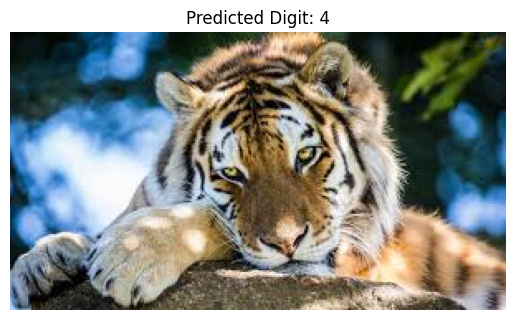

In [ ]:
img_orig = Image.open(file_name)
plt.imshow(img_orig, cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.axis('off')
plt.show()
